In [18]:
# All imports
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import DBSCAN
import mglearn
from sklearn.cluster import AgglomerativeClustering

In [19]:
# Loading "Go To College Dataset" from kaggle.com. The dataset can be found by clicking the link: 
# https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset
data = pd.read_csv('data.csv')

In [20]:
# Encoding categorical variables - just like in Project 1
le=LabelEncoder()
data.iloc[:,0]=le.fit_transform(data.iloc[:,0])
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
data.iloc[:,4]=le.fit_transform(data.iloc[:,4])
data.iloc[:,9]=le.fit_transform(data.iloc[:,9])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])

In [21]:
# Splitting data into X and Y

y = data['in_college']
X = data.drop(['in_college'],axis=1)

In [22]:
scaler =StandardScaler()
#X_scaled = scaler.fit_transform(X)
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data and labels into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 10), (800,), (200, 10), (200,))

In [23]:
#PCA
## Number of features that must be retained to capture 95% of the variance
pca = PCA(n_components=0.95)
# fit PCA model to data
pca.fit(X_scaled)
# transform data onto the first ten principal components
X_pca = pca.transform(X_scaled)


print ('Original number of features:' , X.shape[1])
print ('Reduced number of features:' , X_pca.shape[1])

Original number of features: 10
Reduced number of features: 9


In [24]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_scaled, y):
    X_train1 = X_pca[train_index]
    X_test1 = X_pca[test_index]
    y_train1 = y[train_index]
    y_test1 = y[test_index]

# DEFINING THE NAMES AGAIN BECAUSE I AM GETTING "VARIABLE NOT DEFINED" ERROR
X_train1 = X_train1
X_test1 = X_test1
y_train1 = y_train1
y_test1 = y_test1

# PRINTING SHAPE TO CONFIRM IT'S PCA  
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((800, 9), (800,), (200, 9), (200,))

In [25]:
# radial basis function kernel -  my best performing model from Project2 - running without PCA
svmRBF1 = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF1.score(X_test, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 0.88


In [26]:
# SVC run with X_pca

model1= SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train1, y_train1)

print("Training set R^2: {:.2f}".format(model1.score(X_train1, y_train1)))
print("Test set R^2: {:.2f}".format(model1.score(X_test1, y_test1)))

Training set R^2: 0.96
Test set R^2: 0.87


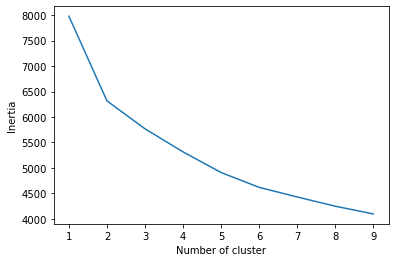

In [27]:
# k-Means (elbow visualization to determine the optimal numbers of clusters) - without PCA

import matplotlib.pyplot as plt
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

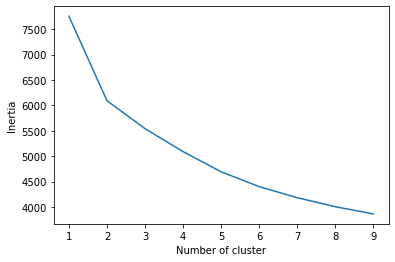

In [28]:
# X_pca: k-Means (elbow visualization to determine the optimal numbers of clusters)
inertiaVals1 = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train1)
    inertiaVals1[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals1.keys()), list(inertiaVals1.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Text(0, 0.5, 'Feature 1')

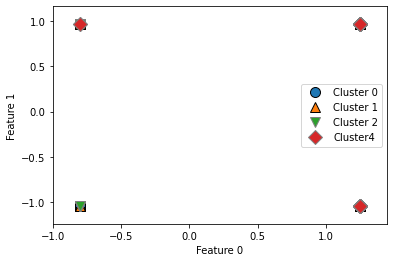

In [29]:
# Aggolmerate - without PCA

import mglearn
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
assignment = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster4"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

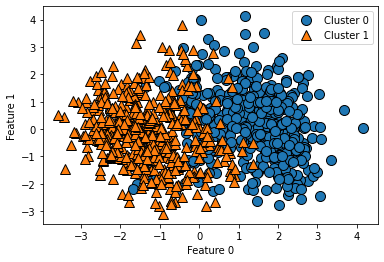

In [30]:
# X_pca: Aggolmerate

agg = AgglomerativeClustering(n_clusters=2)
assignment = agg.fit_predict(X_pca)

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

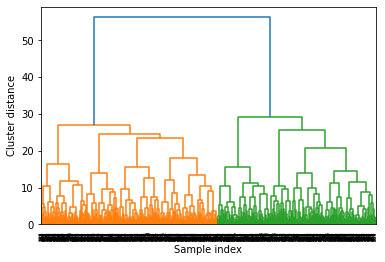

In [31]:
# Hierarchical without PCA

linkage_array = ward(X_train)
# Plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Cluster distance')

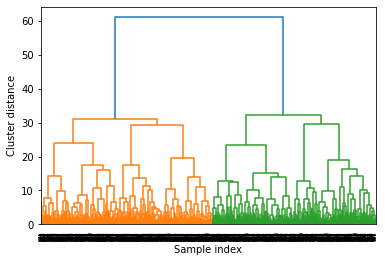

In [32]:
# X_pca: Hierarchical

linkage_array = ward(X_pca)
# Plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Feature 1')

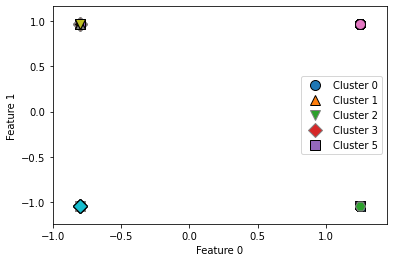

In [33]:
# DBSCAN withou PCA
dbscan = DBSCAN(min_samples=2,eps=0.5)
clusters = dbscan.fit_predict(X_train)

# plot the cluster assignments
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 5"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

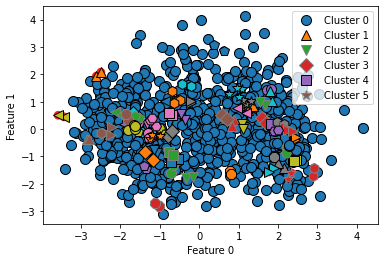

In [34]:
# X_pca: DBSCAN 
dbscan = DBSCAN(min_samples=2,eps=0.5)
clusters = dbscan.fit_predict(X_pca)

# plot the cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")